In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
cifar10 = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
ans = {0 : "airplane", 1 : "automobile", 2 : "bird", 3 : "cat", 4 : "deer" , 5 : "Dog", 6 : "Frog", 7 : "Horse" , 8 : "Ship", 9 : "truck"}

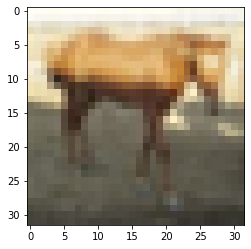

정답 :  Horse


In [6]:
idx = 2000
image = np.array(x_train[idx])
plt.imshow(
# image.reshape(28, 28),
# 마지막 3은 RGB이기 때문
    image.reshape(32, 32, 3),   
    interpolation = 'nearest')
plt.show()
label = y_train[idx]
print("정답 : " , ans[label[0]])

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

In [9]:
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

In [14]:
# 모델

model = tf.keras.models.Sequential()

model.add(Conv2D(filters = 64, kernel_size = 2, activation = tf.nn.relu)) # 필터들의 갯수가 64, kernel_size 즉 필터 사이즈가 2 by 2
model.add(Conv2D(filters = 64, kernel_size = 2, activation = tf.nn.relu)) # 바로 쌓는 것 또한 가능하다.
model.add(MaxPool2D(padding= "SAME"))

model.add(Conv2D(filters = 128, kernel_size = 2, activation = tf.nn.relu))
model.add(Conv2D(filters = 128, kernel_size = 2, activation = tf.nn.relu))
model.add(MaxPool2D(padding = "SAME"))

model.add(Conv2D(filters = 256, kernel_size = 3, activation = tf.nn.relu)) # 3 by 3
model.add(Conv2D(filters = 256, kernel_size = 3, activation = tf.nn.relu))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = tf.nn.relu))
model.add(MaxPool2D(padding = "SAME"))

model.add(Flatten()) # 펴주는 작업
model.add(Dense(256, activation = tf.nn.relu)) # 저번에 했던 것 처럼
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dense(10, activation = tf.nn.softmax)) # 결과값이 총 10개기 때문에
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# 피팅 단계
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6026 - accuracy: 0.4015
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0920 - accuracy: 0.6108
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8873 - accuracy: 0.6895
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7385 - accuracy: 0.7426
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6334 - accuracy: 0.7779
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5505 - accuracy: 0.8092
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4748 - accuracy: 0.8316
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4094 - accuracy: 0.8569
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.3583 - accuracy: 0.8753
Epoch 10/10
1563/1563 [==============================] - 18s 11m

In [16]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.9158 - accuracy: 0.7509


[0.9157774448394775, 0.7508999705314636]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  2

ValueError: You tried to call `count_params` on max_pooling2d_2, but the layer isn't built. You can build it manually via: `max_pooling2d_2.build(batch_input_shape)`.